## Final Project Submission

Please fill out:
* Student name: Agape Nderitu Gichuki
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: William Okomba 
* Blog post URL:


### Introduction
As a data scientist I have been tasked by Microsoft to run exploratory data analysis and generate business insights for their new movie studio venture.

### Business Understanding
Microsoft wants to enter the movie industry by creating a new movie studio, but they lack knowledge and expertise in the field. They recognize the trend of big companies creating original video content and want to capitalize on the opportunity. To achieve this, they need to understand the types of films that are currently successful at the box office and translate those findings into actionable insights that can guide the development of their own movies. The goal is to identify the most lucrative film genres and themes to maximize the success of their new movie studio.

### Data Understanding
The data sources for this analysis will be pulled from the following data files
* `im.db.zip`
  * **Contents**
      ![movie data erd](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-1-project-v2-4/master/movie_data_erd.jpeg)

  * **Format** - It is formatted in a database with the above tables.
        
* `tn.movie_budgets.csv.gz`
  * **Contents**
      The dataset contains the following columns id, release_date, movie, production_budget, domestic_gross and the worldwide_gross.
  * **Format** - The values are comma separated thus a CSV file. 
      
   
In the folder Data are movie datasets from:
* [IMDB](https://www.imdb.com/)
* [The Numbers](https://www.the-numbers.com/)

Because it was collected from various locations, the different files have different formats. Some are compressed CSV (comma-separated values) or TSV (tab-separated values).


### Getting the Data

Below we import the modules necessary modules for viewing the `im.db.zip` and `tn.movie_budgets.csv.gz`.


In [1]:
#import sq3lite and pandas
import sqlite3
import pandas as pd

In [2]:
# Open the relevant files
conn = sqlite3.connect('data/im.db')
cur = conn.cursor()
movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')

### **1. Types of films that are currently succesful.**
The first order of business is getting to know the type of movies that have done well in the box office. This will be coupled with insights on the best directors and writers based on experience in number of movies they have worked in. The `im.db.zip` shall come in necessary for this with sql and python's pandas, matplotlib and seaborn being used for data exploration, cleaning, analysis and visualization.

#### 1.1 Extracting the needed data

The first extraction is done using sql and the movie_id, primary_title, genres ,runtime_minutes and averagerating shall be selected from the movie_basics and the movie_ratings tables sing the movie_id column as the key in the im_db database. After the selection is done the result is appended into a dataframe.

In [3]:
#using sql to specify the needed columns from different columns in different tables.
#Using pandas to store the above extracted information in a dataframe; runtime_genre_rating.
runtime_genre_rating = pd.read_sql("""SELECT movie_id, primary_title, genres ,runtime_minutes, averagerating
                                            FROM movie_basics
                                            JOIN movie_ratings
                                            USING (movie_id);
                                    """,conn )

The second and third extractions also use sql to select necessary collumns and use sql methods and functions to create the needed columns that are then appended to the dataframe.

In [4]:
#using sql to specify the needed columns from different columns in different tables by use of arithmetic functions,
#JOIN and ORDER BY methods. 
#Using pandas to store the above extracted information in a dataframe; directors rating.
directors_rating = pd.read_sql (""" SELECT primary_name,
person_id ,movie_id,COUNT(averagerating)AS number_of_movies_rated,
SUM(averagerating) AS total_movie_rating,
SUM(averagerating)/COUNT(averagerating) AS total_average_rating 
FROM movie_basics
JOIN movie_ratings
USING (movie_id)
JOIN directors
USING (movie_id)
JOIN persons
USING (person_id)
GROUP BY person_id
HAVING number_of_movies_rated > 20
ORDER BY total_average_rating DESC;	

 """,conn)

In [5]:
#using sql to specify the needed columns from different columns in different tables by use of arithmetic functions,
#JOIN and ORDER BY methods. 
#Using pandas to store the above extracted information in a dataframe; writers rating.
writers_rating = pd.read_sql (""" SELECT primary_name,
person_id ,movie_id,COUNT(averagerating)AS number_of_movies_rated,
SUM(averagerating) AS total_movie_rating,
SUM(averagerating)/COUNT(averagerating) AS total_average_rating 
FROM movie_basics
JOIN movie_ratings
USING (movie_id)
JOIN writers
USING (movie_id)
JOIN persons
USING (person_id)

GROUP BY person_id
HAVING number_of_movies_rated> 100
ORDER BY total_average_rating DESC;	

 """,conn)


#### 1.2 Cleaning the data
* The runtime_genre_rating has null values and outlier that need to be dealt with.
* The dataframes directors_rating and writers_rating has no null values and the outliers are valid in the analysis being   done. On this step unnecessary columns that were done using sql to anylyse data and come up with much needed columns necessary for the visualization of the two dataframes are dropped.

In [6]:
#check null values in the runtime_genre_rating dataframe
runtime_genre_rating.isna().sum()

movie_id              0
primary_title         0
genres              804
runtime_minutes    7620
averagerating         0
dtype: int64

In [7]:
# drop and confirm null values are dropped
runtime_genre_rating.dropna(inplace=True)
runtime_genre_rating.isna().sum()

movie_id           0
primary_title      0
genres             0
runtime_minutes    0
averagerating      0
dtype: int64

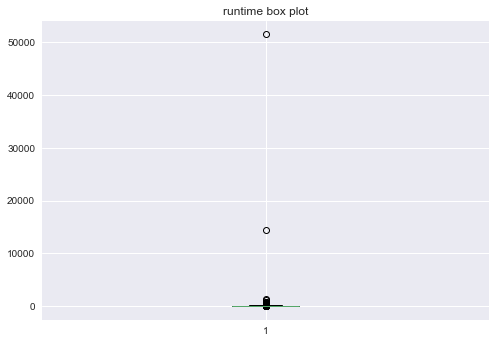

In [8]:
#check outliers in the runtime_genre_rating dataframe using the boxplot
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.boxplot(runtime_genre_rating.runtime_minutes)
plt.title('runtime box plot')
plt.show()

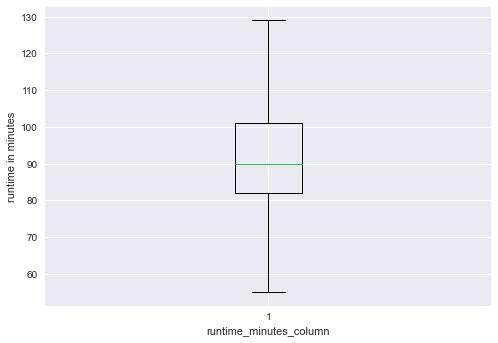

In [9]:
#remove outliers in the runtime_genre_rating dataframe
runtime_genre_rating = runtime_genre_rating[runtime_genre_rating['runtime_minutes'].isin(range(55,130))]
plt.style.use('seaborn')
plt.boxplot(runtime_genre_rating.runtime_minutes)
plt.ylabel('runtime in minutes')
plt.xlabel('runtime_minutes_column')
plt.show()

In [10]:
#create a data frame genre_rating from runtime_genre_rating by dropping a column
genre_rating = runtime_genre_rating.drop(['runtime_minutes'], axis=1)
#making sure there are no null values and duplicates by dropping them
genre_rating = genre_rating.dropna()
genre_rating = genre_rating.drop_duplicates()
genre_rating

,movie_id,primary_title,genres,averagerating
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,Drama,6.9
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.5
6,tt0137204,Joe Finds Grace,"Adventure,Animation,Comedy",8.1
8,tt0154039,So Much for Justice!,History,4.6
...,...,...,...,...
73848,tt9910930,Jeg ser deg,"Crime,Documentary",6.1
73850,tt9913056,Swarm Season,Documentary,6.2
73851,tt9913084,Diabolik sono io,Documentary,6.2
73852,tt9914286,Sokagin Çocuklari,"Drama,Family",8.7


In [11]:
#remove unnecessary columns in the directors_rating and writers_rating 
directors_rating = directors_rating.drop(["person_id","movie_id",'number_of_movies_rated','total_movie_rating'],axis=1)
writers_rating = writers_rating.drop(["person_id","movie_id",'number_of_movies_rated','total_movie_rating'],axis=1)

#### 1.3 Data Analysis

In [12]:
#create a genre_counts that counts the number of times a genre appears and limits it to the first 30 as they are arranged in decending order
genre_counts = genre_rating.genres.value_counts().head(30)
#create a list based on the genre_counts
select = [
    'Drama',
'Documentary',
'Comedy',
'Comedy,Drama',
'Horror',
'Drama,Romance',
'Thriller',
'Comedy,Drama,Romance',
'Comedy,Romance',
'Horror,Thriller',
'Drama,Thriller',
'Biography,Documentary',
'Action', 
'Documentary,Drama',
'Documentary,Music',
'Comedy,Horror',
'Crime,Drama,Thriller',
'Action,Crime,Drama',
'Biography,Documentary,History',
'Crime,Drama',
'Drama,Family',
'Documentary,History',
'Romance',
'Family',
'Horror,Mystery,Thriller',
'Biography,Documentary,Drama',
'Drama,Horror,Thriller',
'Drama,Mystery,Thriller',
'Comedy,Drama,Family', 
'Animation'      
] 
#use the list to get the rows in the genre_rating 
genre_rating =genre_rating[genre_rating['genres'].isin(select)]
#use the groupby method to get mean of the above genres in a series for visualization
genre_rating_series = genre_rating.groupby('genres')['averagerating'].mean().sort_values(ascending = False)
genre_rating_series

genres
Biography,Documentary,Drama      7.480588
Biography,Documentary,History    7.421346
Documentary,Music                7.401807
Documentary,History              7.389055
Documentary,Drama                7.335294
Documentary                      7.251889
Biography,Documentary            7.189109
Drama,Family                     6.605516
Drama                            6.458889
Comedy,Drama                     6.368016
Comedy,Drama,Family              6.367537
Crime,Drama                      6.329787
Comedy,Drama,Romance             6.275528
Drama,Romance                    6.238627
Crime,Drama,Thriller             6.072406
Drama,Thriller                   6.055849
Drama,Mystery,Thriller           5.989437
Family                           5.977662
Romance                          5.959949
Action,Crime,Drama               5.884459
Comedy,Romance                   5.828898
Animation                        5.808647
Comedy                           5.754311
Action                     

#### 1.4 Visualization
This section visualizes the top directors, top writers and top movie genres. 

##### 1.4.1 - Top 30 genres according to their rating. 

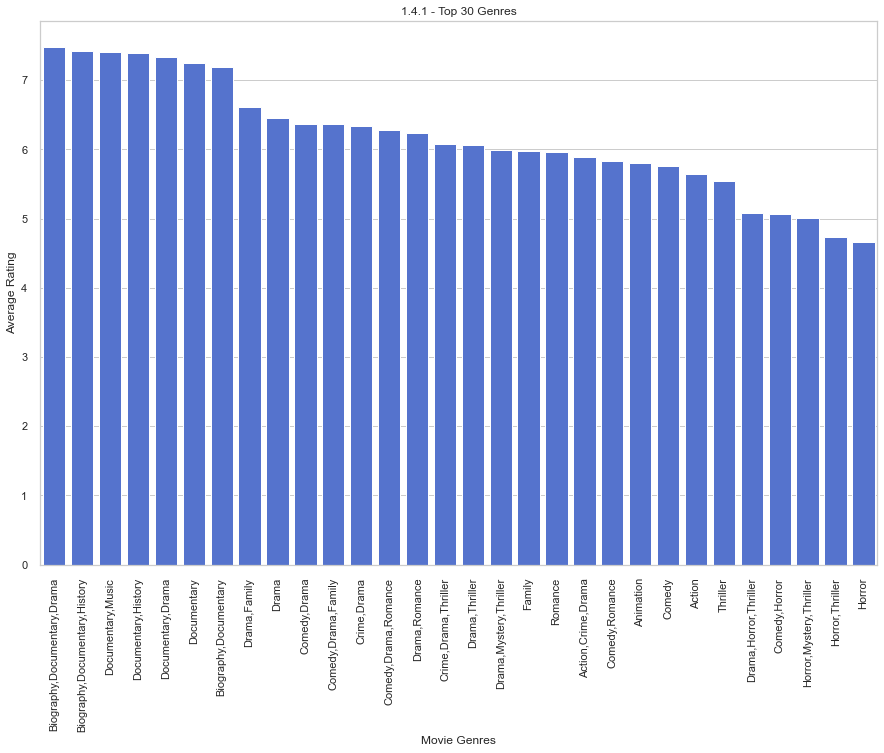

In [33]:
# plot the bargraph from the above series
import seaborn as sns
sns.set(style = 'whitegrid')
fig,ax = plt.subplots( figsize=(15,10))
sns.barplot(data=genre_rating_series,
            x=genre_rating_series.index,y= genre_rating_series.values,
            order= genre_rating_series.values,
            color='royalblue')
plt.xticks(range(len(genre_rating_series)), genre_rating_series.index,rotation=90)
sns.set_color_codes('muted')
plt.xlabel('Movie Genres')
plt.ylabel('Average Rating')
plt.title('1.4.1 - Top 30 Genres')
plt.show()

##### 1.4.2 Top 10 Directors according to their average rating
The directors are have been chosen if they have directed more than 20 movies.

''

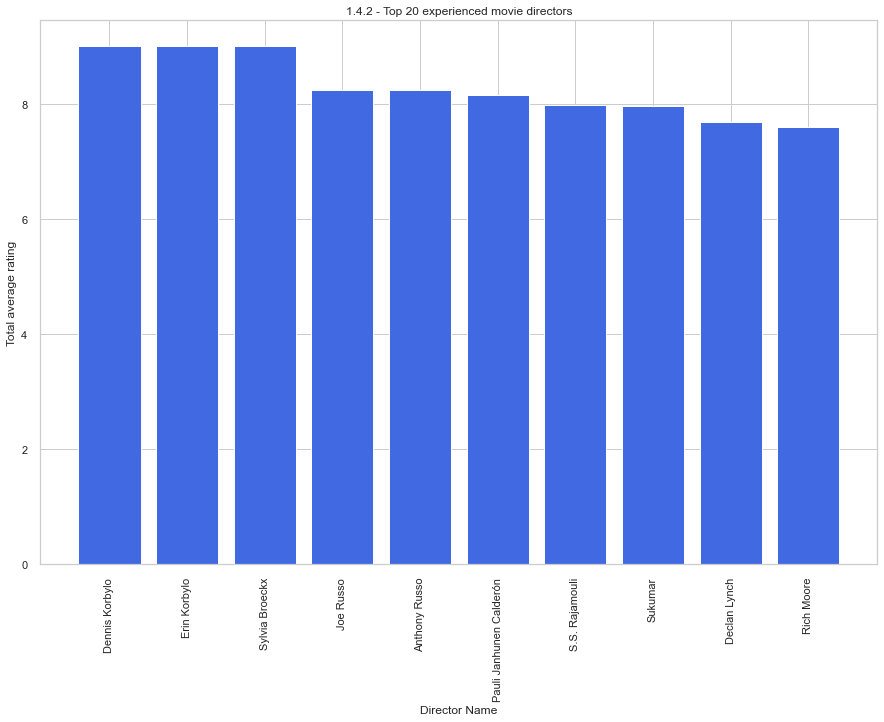

In [34]:
directors_rating = directors_rating.head(10)
fig,ax = plt.subplots( figsize=(15,10))
plt.bar(directors_rating.primary_name,directors_rating.total_average_rating, color = 'royalblue')
plt.xticks(rotation=90)
plt.xlabel('Director Name')
plt.ylabel('Total average rating')
plt.title('1.4.2 - Top 20 experienced movie directors')
;

##### 1.4.5 Top 10 writers according to their average rating
The writers are have been chosen if they have directed more than 100 movies.

''

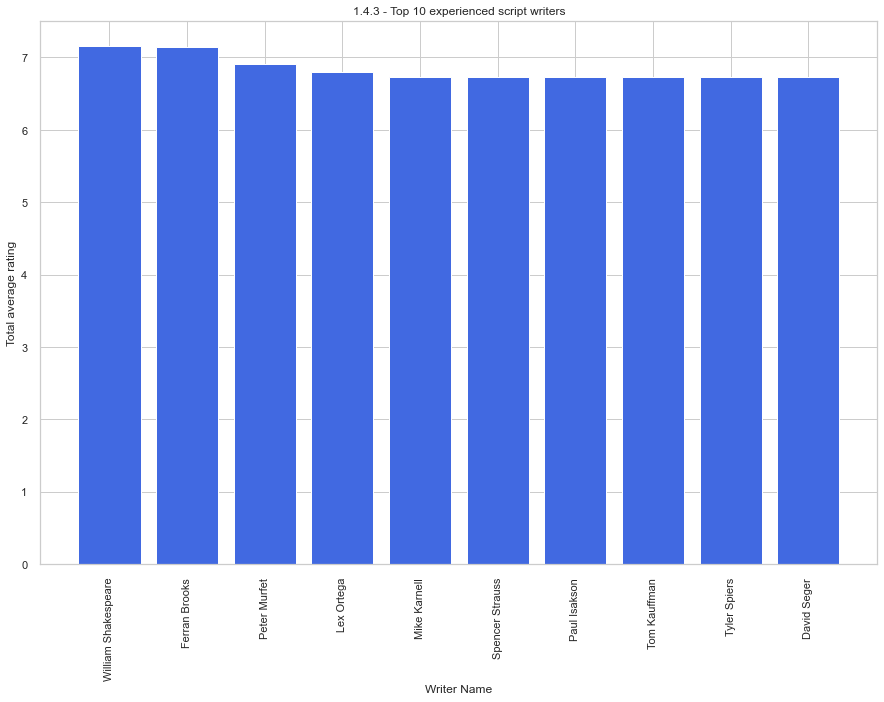

In [35]:
writers_rating = writers_rating.head(10)
fig,ax = plt.subplots( figsize=(15,10))
plt.bar(writers_rating.primary_name,writers_rating.total_average_rating, color = 'royalblue')
plt.xticks(rotation=90)
plt.xlabel('Writer Name')
plt.ylabel('Total average rating')
plt.title('1.4.3 - Top 10 experienced script writers')
;

#### 1.5 Conclusions

* Barplot 1.4.1 shows the best perorming genres and genre combinations that give the highest number of ratings which means they are more succesful.
* Barplot 1.4.2 shows the best 10 performing directors according to experience of more than 20 movies directed by comparing the average rating their movies.    
* Barplot 1.4.3 shows the best 10 performing writers according to experience of more than 100 movies written by comparing the average rating their movies.